# Case Study on Probability for Data Science

### Problem Statement: 
#### To make a suitable machine learning algorithm to predict if the mushroom is  edible or poisonous (e or p) using the given dataset. (Along with other ML algorithms, Naïve Bayes’ Classifier should be applied) Also, if some data pre-processing is necessary do that as well.

##### Attribute Information:
• cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s 
• cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s 
• cap-colour: brown=n, buff=b, cinnamon=c, Gray=g, green=r, pink=p, purple=u,
red=e, white=w, yellow=y 
• bruises: bruises=t, no=f 
• odour: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n,
pungent=p, spicy=s 
• gill-attachment: attached=a, descending=d, free=f, notched=n 
• gill-spacing: close=c, crowded=w, distant=d 
• gill-size: broad=b, narrow=n 
• gill-colour: black=k, brown=n, buff=b, chocolate=h, grey=g, green=r, orange=o, 
pink=p, purple=u, red=e, white=w, yellow=y 
• stalk-shape: enlarging=e, tapering=t 
• Stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, 
missing=? 
• stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s 
• stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s 
• stalk-colour-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o,
pink=p, red=e, white=w, yellow=y 
• stalk-colour-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o,
pink=p, red=e, white=w, yellow=y 
• veil-type: partial=p, universal=u 
• veil-colour: brown=n, orange=o, white=w, yellow=y 
• ring-number: none=n, one=o, two=t 
• ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p,
sheathing=s, zone=z 
• spore-print-colour: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o,
purple=u, white=w, yellow=y 
• population: abundant=a, clustered=c, numerous=n, scattered=s, several=v,
solitary=y 
• habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w,
woods=d 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
data.shape

(8124, 23)

In [4]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [5]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
data.describe(include='object')

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [8]:
data.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

e    4208
p    3916
Name: class, dtype: int64


<AxesSubplot:xlabel='class', ylabel='count'>

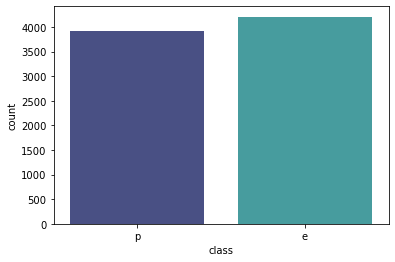

In [9]:
print(data['class'].value_counts())
sns.countplot(data['class'],palette='mako')

It can be seen that there are very similar samples of both poisonous and edible mushrooms. 

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64


<AxesSubplot:xlabel='stalk-root', ylabel='count'>

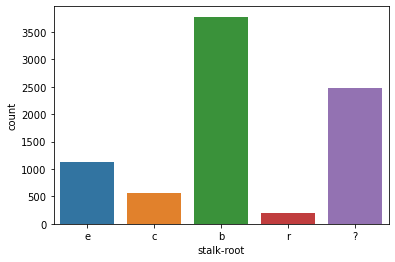

In [10]:
print(data['stalk-root'].value_counts())
sns.countplot(data['stalk-root'])

In [11]:
#'stalk-root' is a categorical column,so missing values('?') are replaced with most frequent category
data['stalk-root']=data['stalk-root'].replace('?', 'b')
data['stalk-root'].value_counts()

b    6256
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

<Figure size 432x288 with 0 Axes>

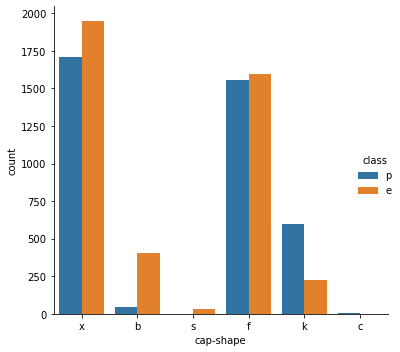

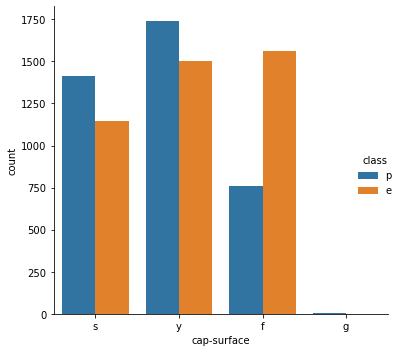

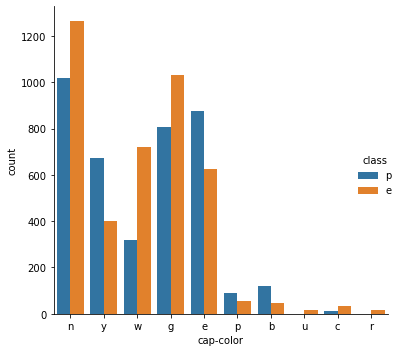

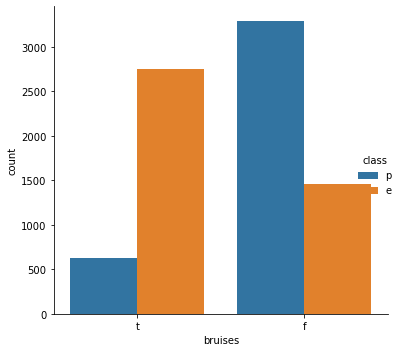

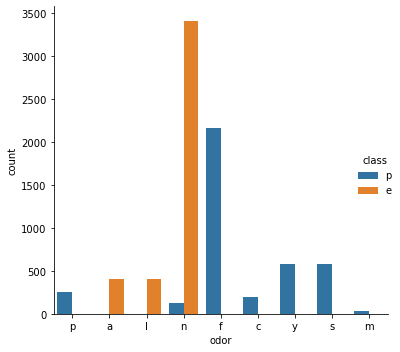

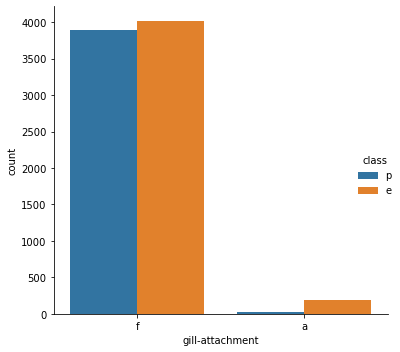

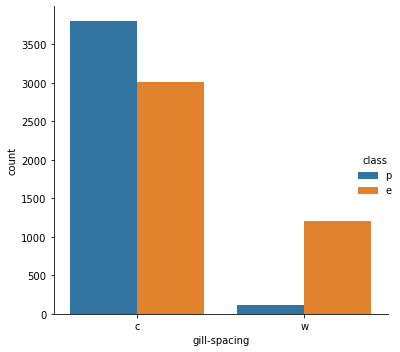

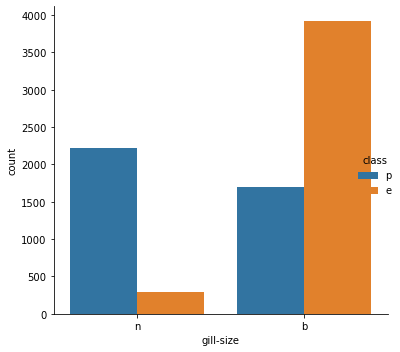

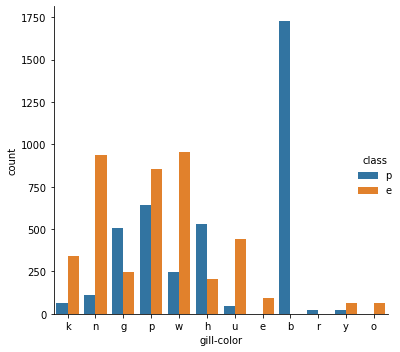

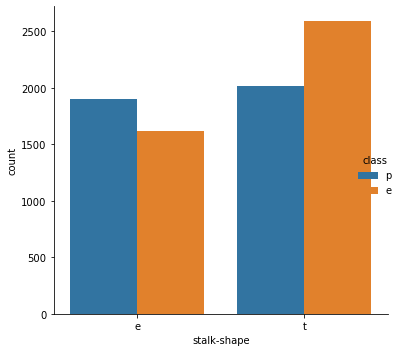

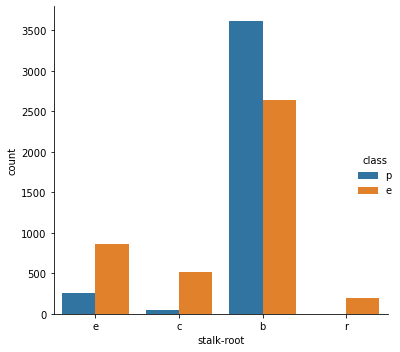

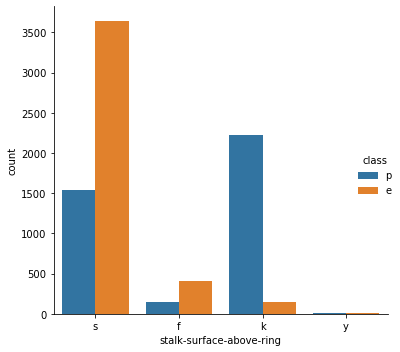

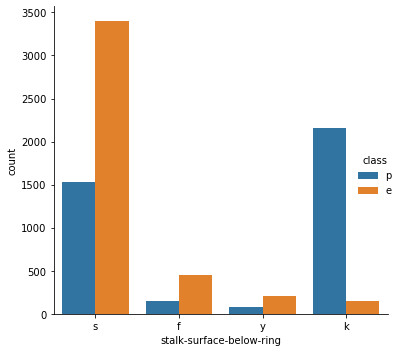

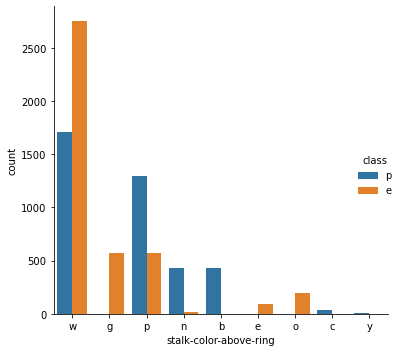

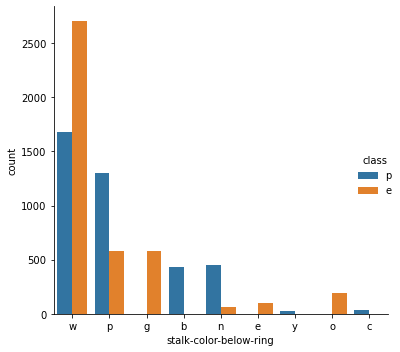

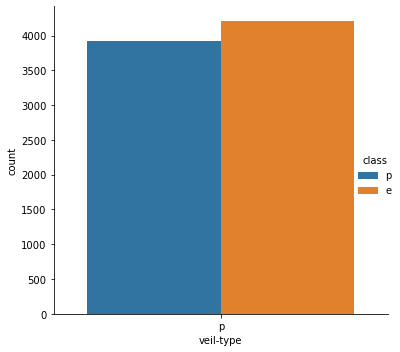

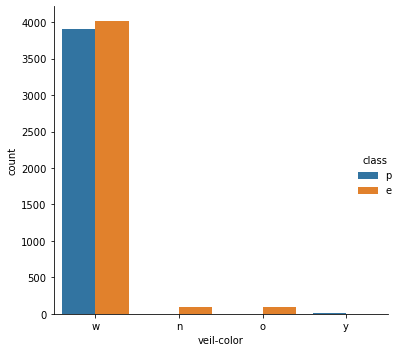

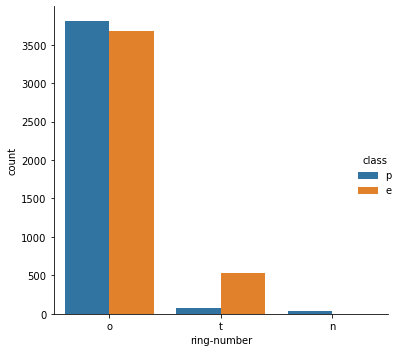

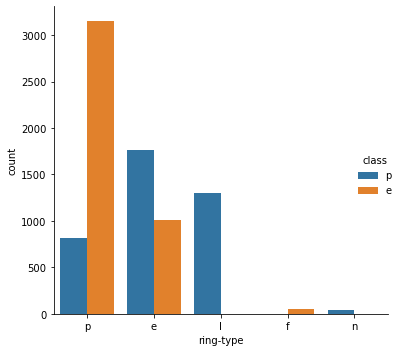

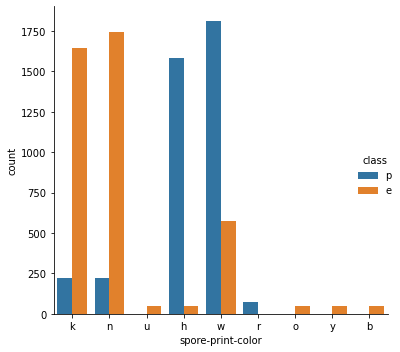

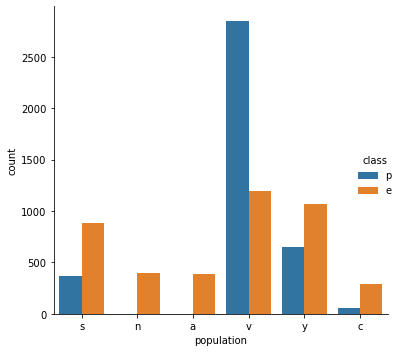

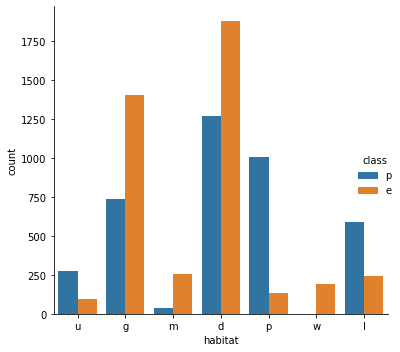

In [12]:
for i,c in enumerate(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor','gill-attachment',
                      'gill-spacing', 'gill-size', 'gill-color','stalk-shape', 'stalk-root',
                      'stalk-surface-above-ring','stalk-surface-below-ring', 'stalk-color-above-ring',
                      'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number','ring-type', 
                      'spore-print-color', 'population', 'habitat']):
    plt.figure(i)
    sns.catplot(data=data, x=c, hue='class',kind='count')
    plt.tight_layout()

In [13]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df= data.apply(le.fit_transform)
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [14]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


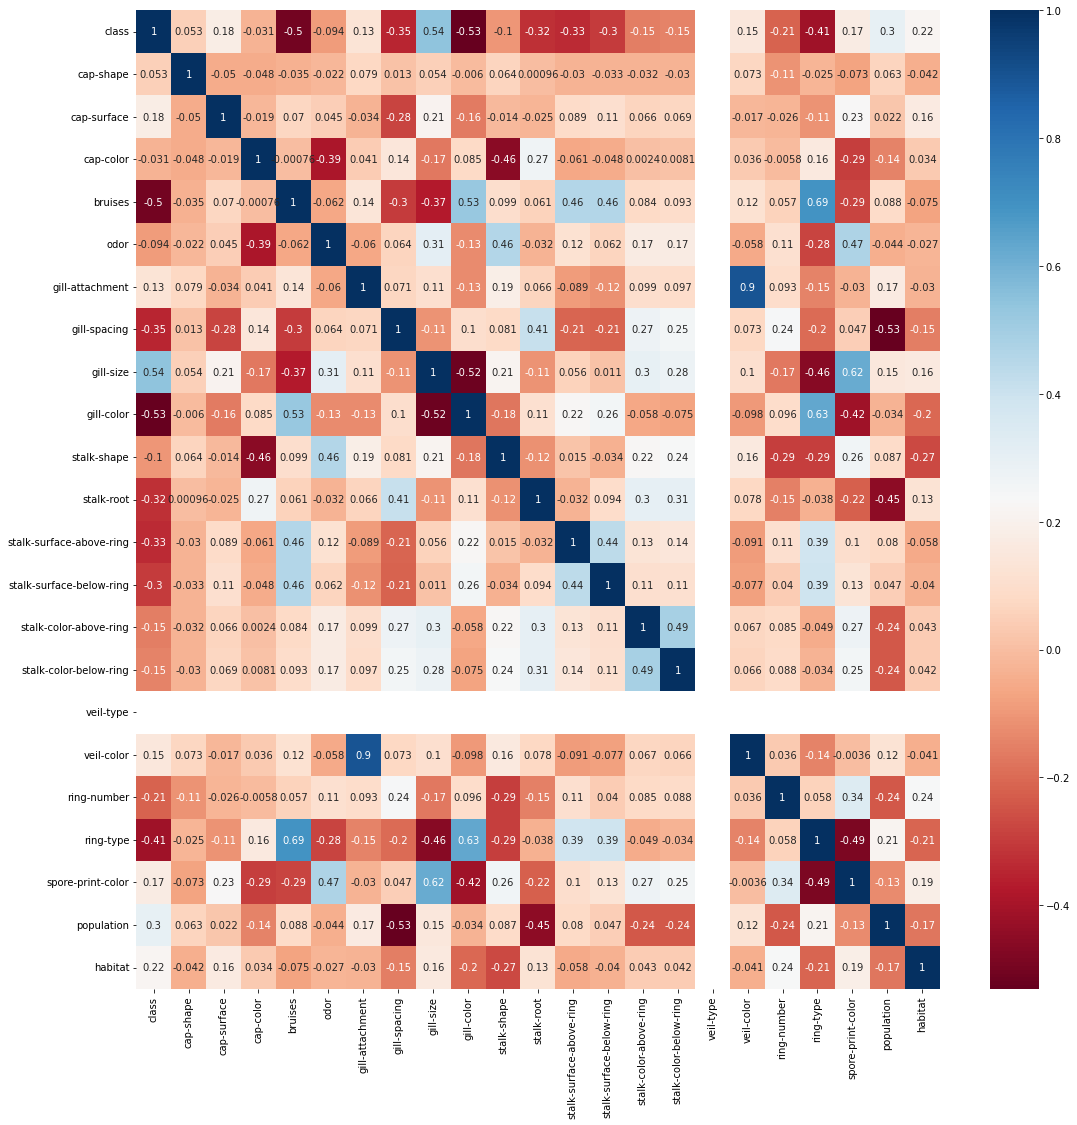

In [15]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), annot=True, cmap='RdBu')
plt.show()

In [16]:
from sklearn.preprocessing import MinMaxScaler
mm= MinMaxScaler()
df[df.columns]=mm.fit_transform(df)
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,0.669621,0.609224,0.500520,0.415559,0.518095,0.974151,0.161497,0.309207,0.437335,...,0.534548,0.727043,0.724335,0.0,0.655178,0.534712,0.572994,0.449594,0.728804,0.251436
std,0.499708,0.320866,0.409958,0.282869,0.492848,0.262966,0.158695,0.368011,0.462195,0.321851,...,0.225325,0.237718,0.238411,0.0,0.080890,0.135532,0.450418,0.297833,0.250416,0.286663
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.400000,0.000000,0.333333,0.000000,0.250000,1.000000,0.000000,0.000000,0.181818,...,0.333333,0.750000,0.750000,0.0,0.666667,0.500000,0.000000,0.250000,0.600000,0.000000
50%,0.000000,0.600000,0.666667,0.444444,0.000000,0.625000,1.000000,0.000000,0.000000,0.454545,...,0.666667,0.875000,0.875000,0.0,0.666667,0.500000,0.500000,0.375000,0.800000,0.166667
75%,1.000000,1.000000,1.000000,0.888889,1.000000,0.625000,1.000000,0.000000,1.000000,0.636364,...,0.666667,0.875000,0.875000,0.0,0.666667,0.500000,1.000000,0.875000,0.800000,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
#splitting dataset
from sklearn.model_selection import train_test_split
X=df.drop(['class'],axis=1)
y=df['class']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2 , random_state=1)

In [18]:
print("x_train shape: ", X_train.shape)
print("x_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (6499, 22)
x_test shape:  (1625, 22)
y_train shape:  (6499,)
y_test shape:  (1625,)


# Model Building

### Logistic regression

In [19]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [20]:
from sklearn.linear_model import LogisticRegression

logit_model=LogisticRegression()
logit_model.fit(X_train, y_train) 
y_pred=logit_model.predict(X_test)

print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("Precision is: ",precision_score(y_test,y_pred,pos_label='positive',average='micro'))
print("Recall is: ",recall_score(y_test,y_pred,pos_label='positive',average='micro'))
print("f1 score is: ",f1_score(y_test,y_pred,pos_label='positive',average='micro'))
confusion_matrix(y_test,y_pred)

Accuracy is:  0.9507692307692308
Precision is:  0.9507692307692308
Recall is:  0.9507692307692308
f1 score is:  0.9507692307692308


array([[788,  32],
       [ 48, 757]], dtype=int64)

### Decision tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("Precision is: ",precision_score(y_test,y_pred,pos_label='positive',average='micro'))
print("Recall is: ",recall_score(y_test,y_pred,pos_label='positive',average='micro'))
print("f1 score is: ",f1_score(y_test,y_pred,pos_label='positive',average='micro'))
confusion_matrix(y_test,y_pred)

Accuracy is:  0.9636923076923077
Precision is:  0.9636923076923077
Recall is:  0.9636923076923077
f1 score is:  0.9636923076923077


array([[784,  36],
       [ 23, 782]], dtype=int64)

### kNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(6,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [23]:
acc_values

[0.9969230769230769,
 0.9969230769230769,
 0.9969230769230769,
 0.9969230769230769,
 0.9969230769230769,
 0.9969230769230769,
 0.9969230769230769,
 0.9969230769230769,
 0.9969230769230769]

Text(0, 0.5, 'accuracy')

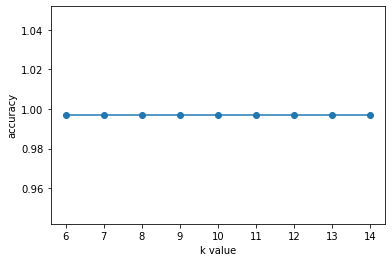

In [24]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [25]:
#giving k value as 8
classifier=KNeighborsClassifier(n_neighbors=8,metric='minkowski')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("Precision is: ",precision_score(y_test,y_pred,pos_label='positive',average='micro'))
print("Recall is: ",recall_score(y_test,y_pred,pos_label='positive',average='micro'))
print("f1 score is: ",f1_score(y_test,y_pred,pos_label='positive',average='micro'))
confusion_matrix(y_test,y_pred)

Accuracy is:  0.9969230769230769
Precision is:  0.9969230769230769
Recall is:  0.9969230769230769
f1 score is:  0.9969230769230769


array([[820,   0],
       [  5, 800]], dtype=int64)

### Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("Precision is: ",precision_score(y_test,y_pred,pos_label='positive',average='micro'))
print("Recall is: ",recall_score(y_test,y_pred,pos_label='positive',average='micro'))
print("f1 score is: ",f1_score(y_test,y_pred,pos_label='positive',average='micro'))
confusion_matrix(y_test,y_pred)

Accuracy is:  1.0
Precision is:  1.0
Recall is:  1.0
f1 score is:  1.0


array([[820,   0],
       [  0, 805]], dtype=int64)

### svc

In [27]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("Precision is: ",precision_score(y_test,y_pred,pos_label='positive',average='micro'))
print("Recall is: ",recall_score(y_test,y_pred,pos_label='positive',average='micro'))
print("f1 score is: ",f1_score(y_test,y_pred,pos_label='positive',average='micro'))
confusion_matrix(y_test,y_pred)

Accuracy is:  1.0
Precision is:  1.0
Recall is:  1.0
f1 score is:  1.0


array([[820,   0],
       [  0, 805]], dtype=int64)

### Naive bayes classifier
### Gaussian

In [28]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("Precision is: ",precision_score(y_test,y_pred,pos_label='positive',average='micro'))
print("Recall is: ",recall_score(y_test,y_pred,pos_label='positive',average='micro'))
print("f1 score is: ",f1_score(y_test,y_pred,pos_label='positive',average='micro'))
confusion_matrix(y_test,y_pred)

Accuracy is:  0.8910769230769231
Precision is:  0.8910769230769231
Recall is:  0.8910769230769231
f1 score is:  0.891076923076923


array([[731,  89],
       [ 88, 717]], dtype=int64)

### bernoulli

In [29]:
from sklearn.naive_bayes import BernoulliNB
classifier= BernoulliNB()
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("Precision is: ",precision_score(y_test,y_pred,pos_label='positive',average='micro'))
print("Recall is: ",recall_score(y_test,y_pred,pos_label='positive',average='micro'))
print("f1 score is: ",f1_score(y_test,y_pred,pos_label='positive',average='micro'))
confusion_matrix(y_test,y_pred)

Accuracy is:  0.8529230769230769
Precision is:  0.8529230769230769
Recall is:  0.8529230769230769
f1 score is:  0.852923076923077


array([[778,  42],
       [197, 608]], dtype=int64)

we should increase the number of mushrooms which are correctly clasified as posionous (true positive) and
we should reduce the mushrooms which are incorrectly classified as edible(false negative). 
Here Random Forest and svc gives 100% accuracy and all the samples are correctly classified. 